# Praktikum 4, Monte Carlo

## Importance sampling

Apply importance sampling to the autoconversion integral that you have studied previously.
The function to integrate, $f(\chi,N_c)$, is a function of $\chi$, which is related to cloud water mixing ratio, and $N_c$, which is the cloud droplet number.
The PDF, $P(\chi,N_c)$, is a normal-lognormal;
it is given by Eqns. (31) and (32) in Larson and Griffin (2013), except that you should include $N_{cn}$ in the denominator of the prefactor.

1. Exponential tilting.
As the importance function $q$, choose a normal-lognormal PDF, like
$P(\chi,N_c)$, but with more favorable values of the means $\chi$ and $N_c$.
Experiment with pairs of mean values until you find a pair that produces reduced noise.

In [48]:
import numpy as np
from scipy.stats import norm


def a_chi_n_c(chi, n_c, alpha=2.47, beta=-1.79):
    H = lambda x: 1 if x > 0 else 0
    return np.nan_to_num(H(chi) * np.nan_to_num(chi ** alpha) * np.nan_to_num(n_c ** beta))


def draw_from_uniform_dist(n: int):
    return np.random.uniform(size=n)


def transform_to_standard_normal(points):
    return norm.ppf(points)


def create_chi_n_c(num_points: int):
    chi = np.array(transform_to_standard_normal(draw_from_uniform_dist(num_points)))
    n_c = np.array(transform_to_standard_normal(draw_from_uniform_dist(num_points)))
    return np.array([chi, n_c])


def transform_to_correlated_by_cholesky(sigma_x, sigma_y, r_12, Y, my):
    L = np.array([[sigma_x, 0], [sigma_y * r_12, sigma_y * np.sqrt(1 - (r_12 ** 2))]])
    return L.dot(Y) + my


def lognormal_correlated_bivariate_dist(correlated_bivariate_dist):
    return np.array([correlated_bivariate_dist[0].copy(), np.exp(correlated_bivariate_dist[1])])


def generate_X(num_points=100, sigma_x=1, sigma_y=1, r_12=0.99, my=0):
    return lognormal_correlated_bivariate_dist(
        transform_to_correlated_by_cholesky(sigma_x, sigma_y, r_12, create_chi_n_c(num_points), my))


X=generate_X(1000, 1, 1, 0.999, 0)
print(X)

[[ 0.44785664 -1.39738324  1.65948262 ...  1.28305794  0.81404773
   0.45754709]
 [ 1.59723471  0.26602733  5.1235031  ...  3.59723158  2.39638008
   1.59938671]]


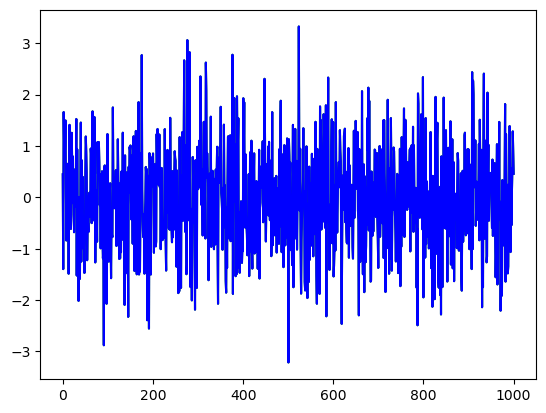

In [49]:
from matplotlib import pyplot as plt

plt.plot(np.linspace(start=0, stop=len(X[0]), num=len(X[0])), X[0], c='g')
plt.plot(np.linspace(start=0, stop=len(X[1]), num=len(X[1])), X[0], c='b')
plt.show()

In [44]:
from scipy.special import gamma, pbdv


def exact_average_autoconversion_rate(my_n_c, my_chi, sigma_chi, sigma_n_c, r_chi_n_c, alpha, beta):
    return (1 / (np.sqrt(2 * np.pi))) * (sigma_chi ** alpha) * np.exp((my_n_c * beta) + ((1 / 2) * sigma_n_c ** 2 * beta ** 2) - ((1 / 4) * ((my_chi / sigma_chi) + r_chi_n_c * sigma_n_c * beta) ** 2)) * gamma(alpha + 1) * pbdv(-(alpha + 1), -((my_chi / sigma_chi) + r_chi_n_c * sigma_n_c * beta))[0]


alpha = 2.47
beta = -1.79

In [ ]:
def P(r_rn, N_rn):
    np.power(2*np.pi)